In [1]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
# in_folder = '../data/'
sp.show_version()

c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\xbacos\Miniconda3\envs\supy_env\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


SuPy version: 2023.7.3.dev0
-------------


In [2]:
def merge_output(scenario_list, suffix_list):

    df_output_merge_x=df_output_merge_x=pd.concat(scenario_list,axis=1,join='inner', keys = suffix_list).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid]
    df_merge_x=df_output_merge_x.SUEWS

    # add available energy, AE
    df_merge_x=df_merge_x.stack().eval('AE=QN+QF-QS').unstack()

    return df_merge_x


In [3]:
TN_rc ='RunControl_TN.nml' 
NF_rc ='RunControl_NF.nml' 
MP_rc ='RunControl_MP.nml' 
MC_rc ='RunControl_MC.nml' 
       
df_state_init_TN = sp.init_supy(TN_rc)
df_state_init_NF = sp.init_supy(NF_rc)
df_state_init_MP = sp.init_supy(MP_rc)
df_state_init_MC = sp.init_supy(MC_rc)

2023-11-03 16:16:17,632 - SuPy - INFO - All cache cleared.
2023-11-03 16:16:18,927 - SuPy - INFO - All cache cleared.
2023-11-03 16:16:20,364 - SuPy - INFO - All cache cleared.
2023-11-03 16:16:21,998 - SuPy - INFO - All cache cleared.


In [4]:
# fnction to set correct layer and param in spartacus
# var = dz_roof, k_roof, cp_roof or wall, 
# vlayer = vertical layer
# hlayer = horizontal layer
def s_s(var, layer, hlayer):
    a = var , '('+str(layer)+', '+str(hlayer) + ')'
    return a



### I have not filled for all typologies here... 
### perhaps use the database_manager --> Spartacus Surface to compare and fill in below


# Set Spartacus file

## Traditional Neighbourhood

In [ ]:

data = df_state_init_TN.copy()

data.dz_roof = 0
data.k_roof = 0
data.cp_roof = 0
data.dz_wall = 0
data.k_wall = 0
data.cp_wall = 0

# This sets albedo and emmissivity to the same for all layers
data.alb_roof = 0.18
data.alb_wall = 0.2
data.emis_roof = 0.92
data.emis_wall = 0.93


#############################   Roof ###############################

#thickness of each layer (stictly five lyaers in total) [m]
t0, t1, t2, t3, t4  = .01,  .04,  .27,  .001, .001
# thermal conductivity of each layer [W/m/K]
k0, k1, k2, k3, k4  = 0.19, 0.035, 0.43, 1.2, 1.2
# specific heat capacity of each layer [J/kg/K]
cp0, cp1, cp2, cp3, cp4  = 837, 1000, 1080, 2000000, 20000000

# Vertical Layer 1
l = 0 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4  
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

# Vertical Layer 2
l = 1 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4  
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

# Vertical Layer 3
l = 2 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4 
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

############################## Wall ###############################

#thickness of each layer (strictly five lyaers in total) [m]
t0, t1, t2, t3, t4  = .09,  .15,  .13,  .001, .001
# thermal conductivity of each layer [W/m/K]
k0, k1, k2, k3, k4  = 0.16, 0.035, 0.43, 1.2, 1.2
# specific heat capacity of each layer [J/kg/K]
cp0, cp1, cp2, cp3, cp4  = 837, 700, 837, 2000000, 2000000

# Vertical Layer 1
l = 0 # layer
# Thickness [m] 
var = 'dz_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

# Vertical Layer 2
l = 1 # layer
# thermal conductivity of each layer [W/m/K]
var = 'dz_wall'
# data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8 # THIS IS PROBABLY A BUG OF SOME KIND. dz_wall only show first layer, not all three as the rest of the params do!
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

# Vertical Layer 3
l = 2 # layer
# specific heat capacity of each layer [J/kg/K]
var = 'dz_wall'
# data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

df_state_init_TN = data.copy()


## Nordic Functionalism

In [ ]:

data = df_state_init_NF.copy()

data.dz_roof = 0
data.k_roof = 0
data.cp_roof = 0
data.dz_wall = 0
data.k_wall = 0
data.cp_wall = 0

# This sets albedo and emmissivity to the same for all layers
data.alb_roof = 0.18
data.alb_wall = 0.2
data.emis_roof = 0.92
data.emis_wall = 0.93


#############################   Roof ###############################

#thickness of each layer (stictly five lyaers in total) [m]
t0, t1, t2, t3, t4  = .01,  .04,  .27,  .001, .001
# thermal conductivity of each layer [W/m/K]
k0, k1, k2, k3, k4  = 0.19, 0.035, 0.43, 1.2, 1.2
# specific heat capacity of each layer [J/kg/K]
cp0, cp1, cp2, cp3, cp4  = 837, 1000, 1080, 2000000, 20000000

# Vertical Layer 1
l = 0 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4  
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

# Vertical Layer 2
l = 1 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4  
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

# Vertical Layer 3
l = 2 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4 
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

############################## Wall ###############################

#thickness of each layer (strictly five lyaers in total) [m]
t0, t1, t2, t3, t4  = .09,  .15,  .13,  .001, .001
# thermal conductivity of each layer [W/m/K]
k0, k1, k2, k3, k4  = 0.16, 0.035, 0.43, 1.2, 1.2
# specific heat capacity of each layer [J/kg/K]
cp0, cp1, cp2, cp3, cp4  = 837, 700, 837, 2000000, 2000000

# Vertical Layer 1
l = 0 # layer
# Thickness [m] 
var = 'dz_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

# Vertical Layer 2
l = 1 # layer
# thermal conductivity of each layer [W/m/K]
var = 'dz_wall'
# data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8 # THIS IS PROBABLY A BUG OF SOME KIND. dz_wall only show first layer, not all three as the rest of the params do!
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

# Vertical Layer 3
l = 2 # layer
# specific heat capacity of each layer [J/kg/K]
var = 'dz_wall'
# data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

df_state_init_NF = data.copy()


## Million Program

In [ ]:

data = df_state_init_MP.copy()

data.dz_roof = 0
data.k_roof = 0
data.cp_roof = 0
data.dz_wall = 0
data.k_wall = 0
data.cp_wall = 0

# This sets albedo and emmissivity to the same for all layers
data.alb_roof = 0.18
data.alb_wall = 0.2
data.emis_roof = 0.92
data.emis_wall = 0.93


#############################   Roof ###############################

#thickness of each layer (stictly five lyaers in total) [m]
t0, t1, t2, t3, t4  = .01,  .04,  .27,  .001, .001
# thermal conductivity of each layer [W/m/K]
k0, k1, k2, k3, k4  = 0.19, 0.035, 0.43, 1.2, 1.2
# specific heat capacity of each layer [J/kg/K]
cp0, cp1, cp2, cp3, cp4  = 837, 1000, 1080, 2000000, 20000000

# Vertical Layer 1
l = 0 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4  
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

# Vertical Layer 2
l = 1 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4  
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

# Vertical Layer 3
l = 2 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4 
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

############################## Wall ###############################

#thickness of each layer (strictly five lyaers in total) [m]
t0, t1, t2, t3, t4  = .09,  .15,  .13,  .001, .001
# thermal conductivity of each layer [W/m/K]
k0, k1, k2, k3, k4  = 0.16, 0.035, 0.43, 1.2, 1.2
# specific heat capacity of each layer [J/kg/K]
cp0, cp1, cp2, cp3, cp4  = 837, 700, 837, 2000000, 2000000

# Vertical Layer 1
l = 0 # layer
# Thickness [m] 
var = 'dz_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

# Vertical Layer 2
l = 1 # layer
# thermal conductivity of each layer [W/m/K]
var = 'dz_wall'
# data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8 # THIS IS PROBABLY A BUG OF SOME KIND. dz_wall only show first layer, not all three as the rest of the params do!
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

# Vertical Layer 3
l = 2 # layer
# specific heat capacity of each layer [J/kg/K]
var = 'dz_wall'
# data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

df_state_init_MP = data.copy()


## Mixed City

In [6]:

data = df_state_init_MC.copy()

data.dz_roof = 0
data.k_roof = 0
data.cp_roof = 0
data.dz_wall = 0
data.k_wall = 0
data.cp_wall = 0

# This sets albedo and emmissivity to the same for all layers
data.alb_roof = 0.18
data.alb_wall = 0.2
data.emis_roof = 0.92
data.emis_wall = 0.93


#############################   Roof ###############################

#thickness of each layer (stictly five lyaers in total) [m]
t0, t1, t2, t3, t4  = .01,  .04,  .27,  .001, .001
# thermal conductivity of each layer [W/m/K]
k0, k1, k2, k3, k4  = 0.19, 0.035, 0.43, 1.2, 1.2
# specific heat capacity of each layer [J/kg/K]
cp0, cp1, cp2, cp3, cp4  = 837, 1000, 1080, 2000000, 20000000

# Vertical Layer 1
l = 0 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4  
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

# Vertical Layer 2
l = 1 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4  
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

# Vertical Layer 3
l = 2 # layer
var = 'dz_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = t0, t1, t2, t3, t4 
var = 'k_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = k0, k1, k2, k3, k4
var = 'cp_roof'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = cp0, cp1, cp2, cp3, cp4

############################## Wall ###############################

#thickness of each layer (strictly five lyaers in total) [m]
t0, t1, t2, t3, t4  = .09,  .15,  .13,  .001, .001
# thermal conductivity of each layer [W/m/K]
k0, k1, k2, k3, k4  = 0.16, 0.035, 0.43, 1.2, 1.2
# specific heat capacity of each layer [J/kg/K]
cp0, cp1, cp2, cp3, cp4  = 837, 700, 837, 2000000, 2000000

# Vertical Layer 1
l = 0 # layer
# Thickness [m] 
var = 'dz_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

# Vertical Layer 2
l = 1 # layer
# thermal conductivity of each layer [W/m/K]
var = 'dz_wall'
# data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8 # THIS IS PROBABLY A BUG OF SOME KIND. dz_wall only show first layer, not all three as the rest of the params do!
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

# Vertical Layer 3
l = 2 # layer
# specific heat capacity of each layer [J/kg/K]
var = 'dz_wall'
# data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'k_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8
var = 'cp_wall'
data.loc[:, [(s_s(var,l,0)),(s_s(var,l,1)),(s_s(var,l,2)),(s_s(var,l,3)),(s_s(var,l,4))]] = 3, 5, 6, 7, 8

df_state_init_MC = data.copy()


In [7]:
grid = df_state_init_TN.index[0]
df_forcing = sp.load_forcing_grid(TN_rc, grid)

s = '2018 07 15'
e = '2018 07 25'

# warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]

2023-11-03 16:16:39,468 - SuPy - INFO - All cache cleared.


<Axes: >

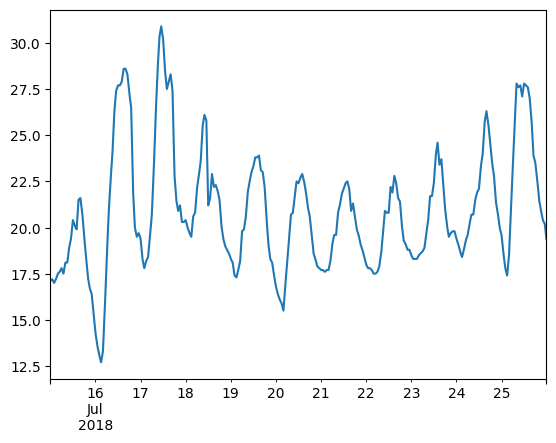

In [8]:
df_forcing['Tair'].plot()

In [9]:
# Run SUEWS 
df_output_TN, df_state_final_TN = sp.run_supy(df_forcing, df_state_init_TN)
df_output_NF, df_state_final_NF = sp.run_supy(df_forcing, df_state_init_NF)
df_output_MP, df_state_final_MP = sp.run_supy(df_forcing, df_state_init_MP)
df_output_MC, df_state_final_MC = sp.run_supy(df_forcing, df_state_init_MC)

2023-11-03 16:16:47,584 - SuPy - INFO - ====================
2023-11-03 16:16:47,585 - SuPy - INFO - Simulation period:
2023-11-03 16:16:47,587 - SuPy - INFO -   Start: 2018-07-15 00:05:00
2023-11-03 16:16:47,588 - SuPy - INFO -   End: 2018-07-25 23:55:00
2023-11-03 16:16:47,590 - SuPy - INFO - 
2023-11-03 16:16:47,591 - SuPy - INFO - No. of grids: 1
2023-11-03 16:16:47,592 - SuPy - INFO - SuPy is running in serial mode
2023-11-03 16:27:29,512 - SuPy - INFO - Execution time: 641.9 s
2023-11-03 16:27:29,513 - SuPy - INFO - ====================



# Merge output to one df

In [12]:
df_merge = merge_output([df_output_TN, df_output_NF, df_output_MP, df_output_MC], ['Traditional neighbourhood', 'Nordic functionalism','Million program', 'Mixed City'])

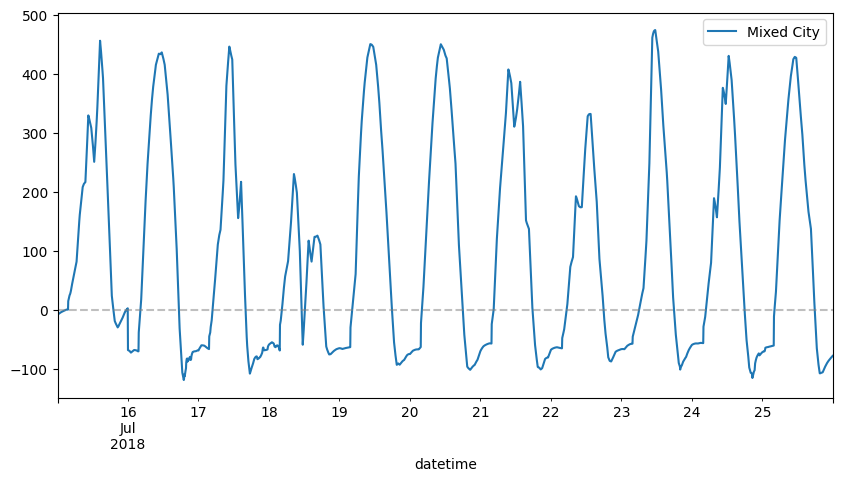

In [24]:
# var = ['QS', 'QH'] # multiple vars
var = 'QS' # single var
figsize = (10,5)

ax = df_merge[var].plot(figsize = figsize)
ax.axhline(0,0, color = 'grey',  linestyle = '--', alpha = 0.5)
